<h3>KNN using Train-Test Split</h3>

Saving iris flower.png to iris flower (1).png


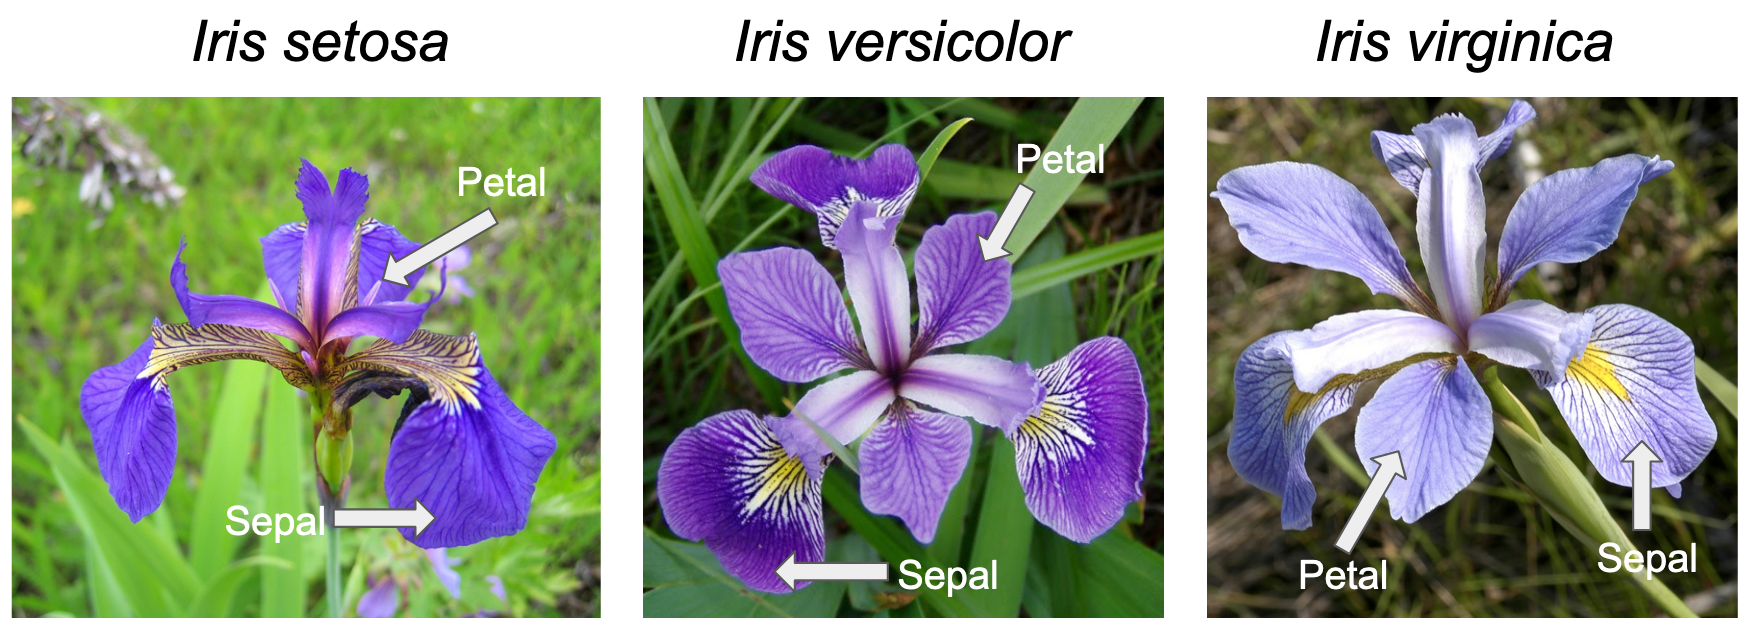

In [ ]:
#image of iris flower
from google.colab import files
from IPython.display import Image
uploaded=files.upload()
Image('iris flower.png',width=600)

In [ ]:
#Importing the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [ ]:
#Read the dataset 
iris = datasets.load_iris()


In [ ]:
# print the names of the features
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [ ]:
# print the label species(class_0, class_1, class_2)
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


<h3>Train Test Split</h3>

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( iris.data, iris.target, test_size=0.3, random_state=1)


<h3> Training and Predicting </h3>

In [ ]:
knnmodel=KNeighborsClassifier(n_neighbors=5)

In [ ]:
knnmodel.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
y_predict1=knnmodel.predict(X_test)

<h3> Accuracy</h3>

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
acc=accuracy_score(y_test,y_predict1)
acc

0.9777777777777777

<h3> Finding the value of k</h3>

In [ ]:
Ks=50
mean_acc=np.zeros((Ks-1))


#train and predict
for n in range(1,Ks):
    neigh=KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1]=accuracy_score(y_test,yhat)

In [ ]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.9777777777777777 with k= 1


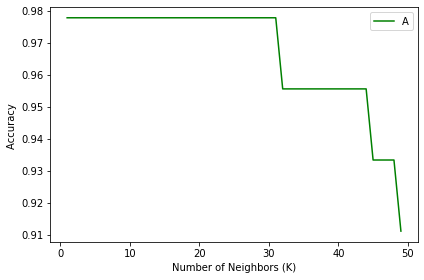

In [ ]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.legend(('Accuracy '))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_predict1)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[14  0  0]
 [ 0 18  0]
 [ 0  1 12]]

True Positives(TP) =  14

True Negatives(TN) =  18

False Positives(FP) =  0

False Negatives(FN) =  0


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predict1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.95      1.00      0.97        18
           2       1.00      0.92      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.98        45
weighted avg       0.98      0.98      0.98        45

